# Exploratory Data Analysis - EDA

## 1 - Introduction

This dataset is retrieved from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/adult).

Can be described as "*Predict whether income exceeds $50K/yr based on census data. Also known as 'Census Income' dataset*"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 2 - Load data

In [2]:
! ls -l data/*

-rw-rw-r-- 1 vyago vyago    4119 jul 18 17:29 data/sample_df.pkl
-rw-rw-r-- 1 vyago vyago  979830 jul 13 18:41 data/test_eda.pkl
-rw-rw-r-- 1 vyago vyago 2181886 jul 18 17:34 data/train_eda.pkl

data/raw:
total 5864
-rw-rw-r-- 1 vyago vyago 3974305 jul 13 13:05 adult.data
-rw-rw-r-- 1 vyago vyago    5229 jul 13 13:05 adult.names
-rw-rw-r-- 1 vyago vyago 2003153 jul 13 13:05 adult.test
-rw-rw-r-- 1 vyago vyago     140 jul 13 13:05 Index
-rw-rw-r-- 1 vyago vyago    4267 jul 13 13:05 old.adult.names


In [3]:
colnames = ['age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country',
            'label']

train = pd.read_csv('data/raw/adult.data',
                    header=None,
                    names = colnames)
train["label"] = (train["label"] == " >50K").astype(int)

In [4]:
train.shape

(32561, 15)

In [5]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [6]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'label'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [8]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [9]:
numerics  = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train_num = train.select_dtypes(include=numerics)
train_cat = train.select_dtypes(include=['object'])

In [10]:
print("Nº of numerical variables: %d" % len(train_num.columns))
print("Nº of categorical variables: %d" % len(train_cat.columns))

Nº of numerical variables: 7
Nº of categorical variables: 8


In [11]:
train_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

### Missing values

In [12]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

Nice!, in principle we do not have missing observations.

Lets take a look to the values of each variable:

In [13]:
for col in train.columns: 
    unique_vals = np.unique(train[col])
#    print(unique_vals)
    print("---> Feature %s : " % col)
    print(str(unique_vals))

---> Feature age : 
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
---> Feature workclass : 
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
---> Feature fnlwgt : 
[  12285   13769   14878 ... 1366120 1455435 1484705]
---> Feature education : 
[' 10th' ' 11th' ' 12th' ' 1st-4th' ' 5th-6th' ' 7th-8th' ' 9th'
 ' Assoc-acdm' ' Assoc-voc' ' Bachelors' ' Doctorate' ' HS-grad'
 ' Masters' ' Preschool' ' Prof-school' ' Some-college']
---> Feature education-num : 
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
---> Feature marital-status : 
[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
---> Feature occupation : 
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repai

Now results evident that some features have missing values: 

In [14]:
print("Features with missing values: ")
for col in train.columns : 
    if (' ?' in train[col].values) : 
        print("--->%s"%col)

Features with missing values: 
--->workclass
--->occupation
--->native-country


/tmp/ipykernel_14277/452650931.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (' ?' in train[col].values) :


In [15]:
train = train.replace(" ?", np.NaN)
print(round(train.isnull().sum()/len(train)*100))

age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
label             0.0
dtype: float64


In [16]:
train[train.isnull().any(axis=1)]['label'].value_counts()

0    2066
1     333
Name: label, dtype: int64

So basically if we choose to remove, we would lose 333 positive examples.

/home/vyago/miniconda3/envs/LSTM/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


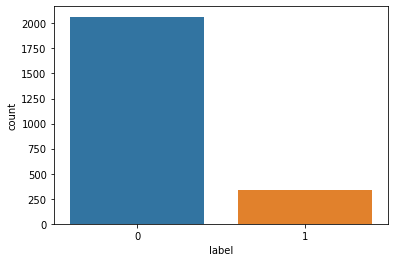

In [17]:
sns.countplot(train[train.isnull().any(axis=1)]['label'])
plt.show()

## 3 - Visualization

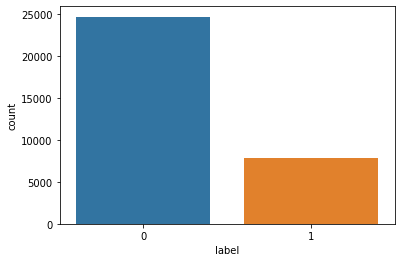

In [18]:
sns.countplot(x   = "label",
             data = train)
plt.show()

In [19]:
train["label"].value_counts(normalize=True)

0    0.75919
1    0.24081
Name: label, dtype: float64

As [google guidelines](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) explain, a mild data imbalance is present (24 % of individuals represent positive class)

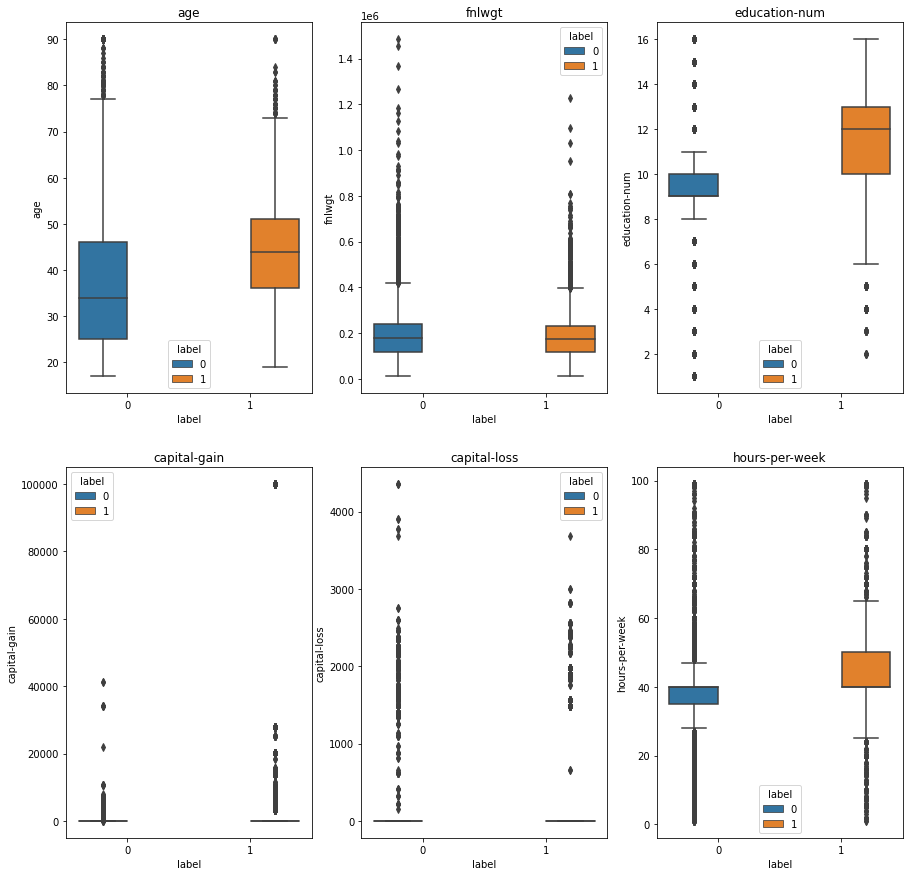

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

for column, ax in zip(train_num.columns, axs.ravel()) : 

    sns.boxplot(x    = 'label',
                y    = column,
                hue  = 'label',
                data = train,
                ax = ax).set(title=column)

Heavy outliers are present in variables : 
- `capital_gain`
- `capital_loss`

This is somewhat expected, socioeconomic variables present a non-normal behaviour. Capital loss/gain and for example followers in social media tend to ve very skewed.

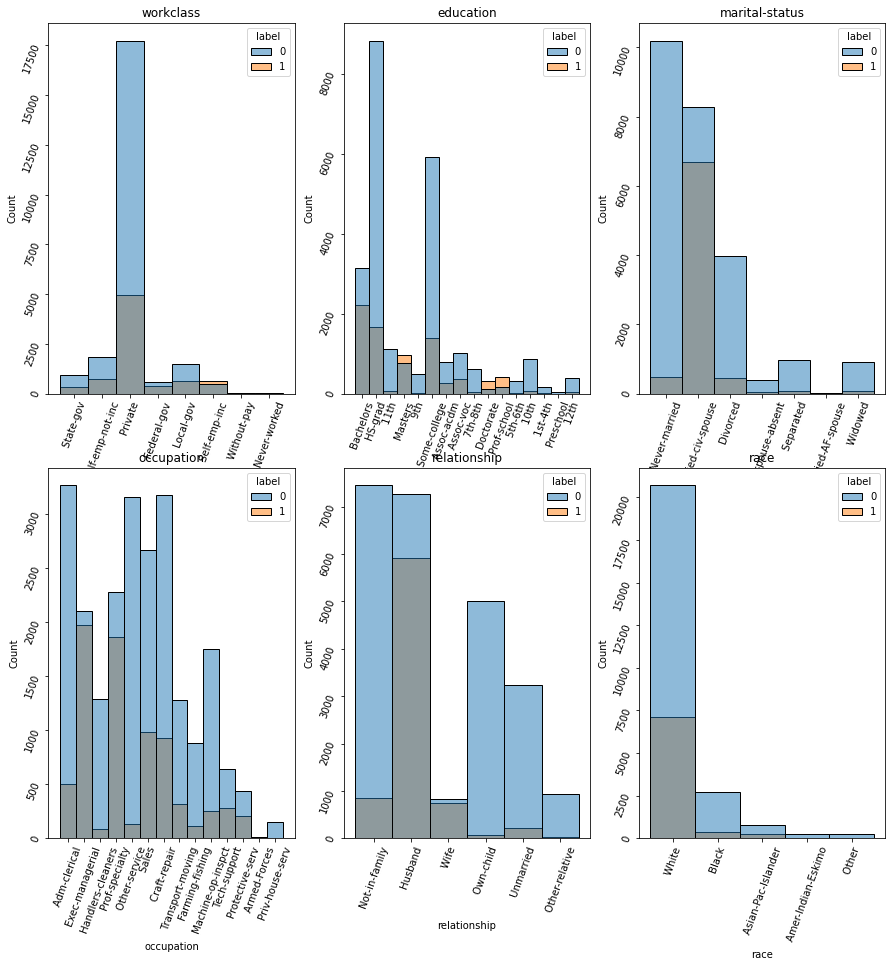

In [21]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

for column, ax in zip(train_cat.columns, axs.ravel()) : 

    sns.histplot(x   = column,
                 hue = "label",
                data = train,
                ax   = ax).set(title=column)
    ax.tick_params(labelrotation=70)
    
plt.show()

Quick insights: 
    
 - Variable `workclass` seems to have missing values marked as  `?`
 - People working in Private sector represent the majority of the >50k individuals. Not surprissing.
 - White mens individuals are the wealthiest

In [22]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


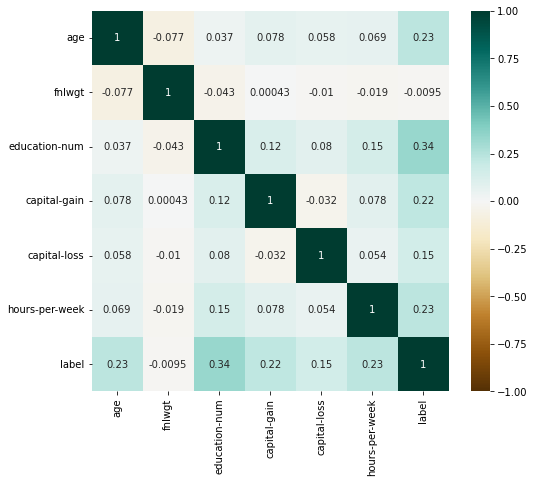

In [23]:
r = train.corr()
f, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(r, annot=True, ax=ax, vmin=-1, vmax=1, cmap='BrBG')
plt.show()

The label is lineary correlated with (in order of importance): 

1. education-num
2. age
3. hours-per-week
4. capital-gain
5. capital-loss

Maybe `fnlwgt` is a candidated to be discarded

## 4 - Saving data

In [24]:
train.to_pickle('./data/train_eda.pkl')

## 4 - Conclusions

 - There are missing values in variables `workclass`, `occupation` `native-country`
 - Features `capital-gain` & `capital-loss` have lots of positive outliers
 - The data presents a mild imbalance, only 24% of obs are positive
 - 8 categorical features needs one-hot encoding